# Assignment 5
### Do all four questions.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [ ]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [6]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [7]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


Each of the vectors, when left-multiplied by $A$, extract one of $A$'s columns: $e_1$ extracts the first, $e_2$ the second, and $e_3$ the third. This is because the product of an $M \times N$ matrix and $N \times 1$ vector is equal to the linear combination of the matrix's columns, where the linear coefficients are the vector's elements. $Ae_1$, for example, extracts only the first column of $A$ since $e_1$'s second and third elements (i.e., the linear coefficients for the second and third columns of $A$) are both zero.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [8]:
u = np.ones(3)

In [9]:
print(A @ u)

[ 6. 15. 24.]


As mentioned in the previous part, a column vector like $u$ acts as a set of linear coefficients when left-multiplied by $A$. Thus, since $u$'s elements are all 1, $Au$'s elements are simply the sums of the columns for each row -- i.e., $[1+2+3, 4+5+6, 7+8+9]$.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [10]:
A = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [11]:
print(A @ x)

[-2  4 11]


Multiplying an identity matrix (like $A$) by any vector results in the same vector. Hence $A$ times $x$ produces $x$.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [12]:
A = np.array([[0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

In [13]:
print(A @ x)

[11 -2  4]


In [14]:
B = np.array([[0,1,0],
              [1,0,0],
              [0,0,1]])
print(B @ x)

[ 4 -2 11]


As in part **c**, the matrix-vector products consist of the vector's elements, except this time they're out of order. The rows correspond to the elements, and the columns correspond to their order. If the first column has a 1 in the second row, for example, then the output vector's first element will be equal to the input vector's second.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [15]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


As alluded to in the instructions, what results is a $3 \times 3$ matrix whose entries correspond to transition probabilities between the three states. The first column, for example, reveals that observations in state 1 transition to state 2 3% of the time and to state 3 47% of the time, and that roughly half the time they remain in state 1.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [27]:
print(A@e_1)
print(A@A@e_1)
print(A@A@A@e_1)
print(A@A@A@A@e_1)
print(A@A@A@A@A@e_1)

[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]


In [28]:
print(A@e_2)
print(A@A@e_2)
print(A@A@A@e_2)
print(A@A@A@A@e_2)
print(A@A@A@A@A@e_2)

[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]


In [29]:
print(A@e_3)
print(A@A@e_3)
print(A@A@A@e_3)
print(A@A@A@A@e_3)
print(A@A@A@A@A@e_3)

[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]


The starting vectors are the columns of A, which represent observations' probabilities of transitioning into each of the states conditional on the state they're currently in. $Ae_1$ represents the transition probabilities for observations in state 1, for instance.

Each successive vector's entries then correspond to the proportions of observations in each state (given their initial state) after some number of time steps. We see that with only 4-5 time steps, the proportions converge.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [11]:
T = np.array([[1/4, 1/2],
              [3/4, 1/2]])

In [3]:
p_0 = np.array([1,0]) # initial state
p_1 = T @ p_0
print(p_1)

[0.25 0.75]


Multiplying $T$ by the initial condition vector $[1, 0]$ returns the transition probabilities, or proportions, for observations that begin in state 1. We expect 25% of such observations to remain in state 1 and the other 75% to transition to state 2.

In [6]:
p_2 = T @ p_1
print(p_2)

[0.4375 0.5625]


Multiplying by $T$ a second time gives the distribution of observations that begin in state 1 *after the first time step*. After a single time step, or transition, we expect around 44% of objects that begin in state 1 to be in state 1 and the remaining 56% to be in state 2.

In [12]:
p_0 = np.array([1,0]) # initial state

for i in range(10):
    p_1 = T @ p_0
    print(p_1)
    p_0 = p_1

[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]


This suggests that after roughly four time steps the distribution of observations that begin in state 1 stabilizes at a 40/60 share between states 1 and 2, respectively.

In [13]:
p_0 = np.array([0,1]) # initial state

for i in range(10):
    p_1 = T @ p_0
    print(p_1)
    p_0 = p_1

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]


The $[0, 1]$ initial condition produces a different set of transition proportions after the first time step, but from there it stabilizes to the same 40/60 split.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

### A) Load data & check for missingness

In [2]:
df = pd.read_csv('cville_weather.csv')
print(df.shape)
df.head(3).T

(411, 13)


,0,1,2
STATION,US1VACRC002,US1VACRC002,US1VACRC002
NAME,"CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 0.5 NNE, VA US","CHARLOTTESVILLE 0.5 NNE, VA US"
DATE,2024-01-04,2024-01-07,2024-01-09
DAPR,NaN,NaN,NaN
DAPR_ATTRIBUTES,NaN,NaN,NaN
MDPR,NaN,NaN,NaN
MDPR_ATTRIBUTES,NaN,NaN,NaN
PRCP,0.03,1.08,0.24
PRCP_ATTRIBUTES,",,N",",,N",",,N"
SNOW,NaN,NaN,NaN


In [3]:
df.isnull().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

Several of the variables are missing almost completely. PRCP looks like the best (only?) candidate for further analysis.

### B) Create rain variable

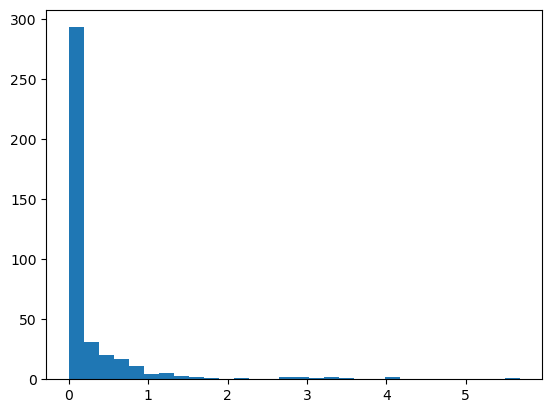

In [4]:
plt.hist(df['PRCP'].dropna(), bins=30)
plt.show()

In [5]:
df['rain'] = (df['PRCP'] > 0).astype(int)
print(df['rain'].mean()) # ~44%

0.43552311435523117


### C) Build Markov chain with states rain = 0, rain = 1

In [6]:
## Define sequence and possible states
seq = df['rain'].tolist()
states = list(np.unique(seq))

## Create transition count matrix
S = len(states)
T = len(seq)
tr_counts = np.zeros((S, S))

for t in range(T-1):
    x_t = seq[t]        # current state
    x_tp1 = seq[t+1]    # next state
    index_from = states.index(x_t)
    index_to = states.index(x_tp1)
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n{tr_counts}')

## Sum transition counts by row
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts:\n{sums}')

## Compute proportion of each state overall
print(f'\nState Proportions:\n{sums / np.sum(sums)}')

## Normalize to get transition probabilities
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts))

transition_df = pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)
print(f'\nTransition Proportions:\n')
print(transition_df)


Transition Counts:
[[169.  63.]
 [ 62. 116.]]

State Counts:
[[232.]
 [178.]]

State Proportions:
[[0.56585366]
 [0.43414634]]

Transition Proportions:

      0     1
0  0.73  0.27
1  0.35  0.65


### D) Chain interpretation

According to the chain, if it were rainy yesterday, there is a 65% it rains today; and if it were clear yesterday, there is only a 27% of rain today.

### E) Forecasting

#### Clear start:

In [ ]:
np.random.seed(100)

states = [0, 1]

initial_state = 0
state_index = states.index(initial_state)

## Create initial condition vector
density = np.zeros(len(states))
density[state_index] = 1

n = 8 # number of time steps

for t in range(n):
    density = tr_pr.T @ density # row-stochastic => transpose
    print(density)


[0.72844828 0.27155172]
[0.62522232 0.37477768]
[0.58598266 0.41401734]
[0.57106635 0.42893365]
[0.56539615 0.43460385]
[0.56324072 0.43675928]
[0.56242137 0.43757863]
[0.56210991 0.43789009]


#### Rainy start:

In [18]:
np.random.seed(100)

initial_state = 1
state_index = states.index(initial_state)

density = np.zeros(len(states))
density[state_index] = 1

n = 8

for t in range(n):
    density = tr_pr.T @ density
    print(density)

[0.34831461 0.65168539]
[0.48072072 0.51927928]
[0.53105274 0.46894726]
[0.55018563 0.44981437]
[0.55745869 0.44254131]
[0.56022342 0.43977658]
[0.56127439 0.43872561]
[0.5616739 0.4383261]


When starting from a clear day (i.e., with initial condition vector $[1,0]$), the chain converges to a 56/44 split between the clear and rainy states after 4-5 time steps. Starting from a rainy state is no different, only the densities evolve in opposite directions.

### F) KDE of PRCP when rain = 1

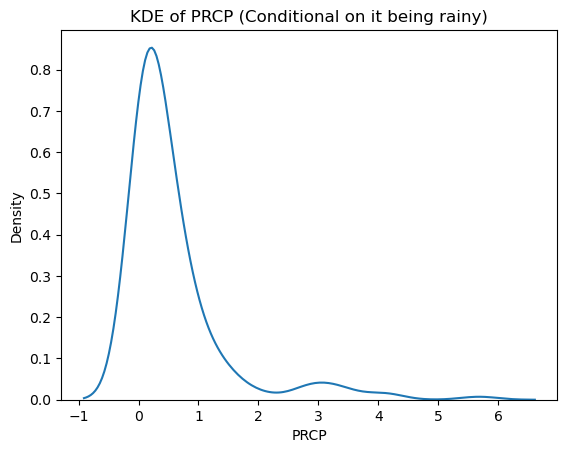

In [23]:
df_rainy = df[df['rain'] == 1]
sns.kdeplot(data=df_rainy, x='PRCP').set(title='KDE of PRCP (Conditional on it being rainy)')
plt.show()

### G) Room for improvement

As is, the model fails to account for the effect of season/time of year on rainfail patterns. One way to account for this while keeping the current state space would be to fit separate models for several multi-month windows instead of using the same model to make predictions year-round.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

#### Code from class:

In [25]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [ ]:
## Extract state space
states = set(data[0])
for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)

In [ ]:
S = len(states)
tr_counts = np.zeros((S,S))

## Compute transition counts
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1]
        x_t = seq[t]
        # Transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[9.800000e+02 2.100000e+01 1.484000e+03 ... 1.453000e+03 4.230000e+02
  4.180000e+02]
 [2.000000e+01 1.398000e+04 2.278000e+03 ... 1.981400e+04 8.200000e+01
  1.410000e+02]
 [1.364000e+03 1.908000e+03 3.463220e+05 ... 4.640200e+04 5.315000e+03
  6.207000e+03]
 ...
 [9.790000e+02 1.155800e+04 6.471200e+04 ... 1.203902e+06 4.648000e+03
  6.720000e+03]
 [1.170000e+03 1.060000e+02 5.539000e+03 ... 6.171000e+03 1.123400e+04
  2.868000e+03]
 [1.745000e+03 1.710000e+02 5.081000e+03 ... 9.393000e+03 8.861000e+03
  3.239700e+04]]


In [49]:
## Sum transition counts by row
sums = tr_counts.sum(axis=0, keepdims=True) # axis=0 -> sum down rows, axis=1 -> sum across columns
print('State proportions: \n')
print(sums)

## Normalize transition counts to get proportions
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

State proportions: 

[[1.431100e+04 1.058700e+05 1.224335e+06 3.952900e+05 5.102590e+05
  5.017520e+05 1.978286e+06 2.292350e+05 1.112820e+05 4.086350e+05
  5.077810e+05 3.701250e+05 1.803502e+06 8.010000e+03 3.705730e+05
  5.505930e+05 1.000000e+00 3.168450e+05 2.797710e+06 3.603000e+03
  4.415730e+05 2.171460e+05 5.791000e+04 8.740570e+05 8.393600e+05
  1.063810e+05 3.859100e+04 3.000000e+00 4.930000e+02 1.038800e+04
  1.200000e+01 3.851989e+06 1.743200e+05 8.886410e+05 6.544000e+05
  2.363902e+06 7.252200e+04 1.627100e+05]]
Transition Proportions:

                     Inwood  Chinatown  Hell's Kitchen  Flatiron District  \
Inwood                 0.07       0.00            0.00               0.00   
Chinatown              0.00       0.13            0.00               0.00   
Hell's Kitchen         0.10       0.02            0.28               0.03   
Flatiron District      0.00       0.01            0.01               0.16   
Greenwich Village      0.00       0.02            0.01   

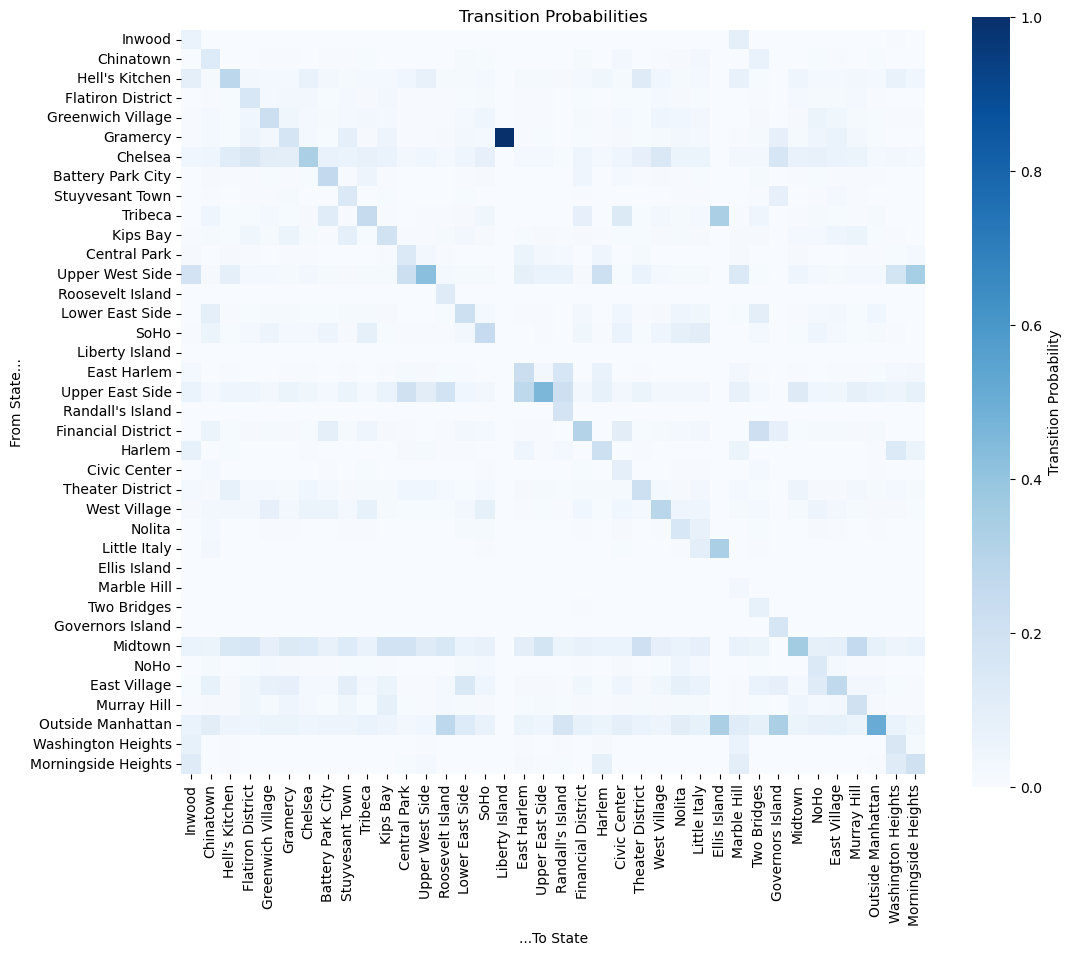

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Most common routes

In [40]:
df_long = tr_df.stack().reset_index()
df_long.columns = ['From', 'To', 'Transition Prob']
df_long.sort_values('Transition Prob', ascending=False).head(20)

,From,To,Transition Prob
206,Gramercy,Liberty Island,1.00
1365,Outside Manhattan,Outside Manhattan,0.51
702,Upper East Side,Upper East Side,0.46
468,Upper West Side,Upper West Side,0.42
1209,Midtown,Midtown,0.36
493,Upper West Side,Morningside Heights,0.35
234,Chelsea,Chelsea,0.33
369,Tribeca,Ellis Island,0.33
1015,Little Italy,Ellis Island,0.33
1360,Outside Manhattan,Governors Island,0.33


Outside of the Gramercy to Liberty Island route -- which, given its 100% transition probability, likely only occurred once or a couple of times -- the most common routes are ones in which passengers were picked up and dropped off in the same neighborhood. The most common route between *different* neighborhoods is Upper West Side to Morningside Heights, closely followed by several different routes to Ellis Island.

#### Order?

Since it is unlikely for a taxicab's next location to depend on their prior locations (as opposed to their current one), taxicabs are likely order 1. More often than not, all the information we need to predict a cab's route is the location of where they picked up their passenger(s).

#### Hell's Kitchen Forecast

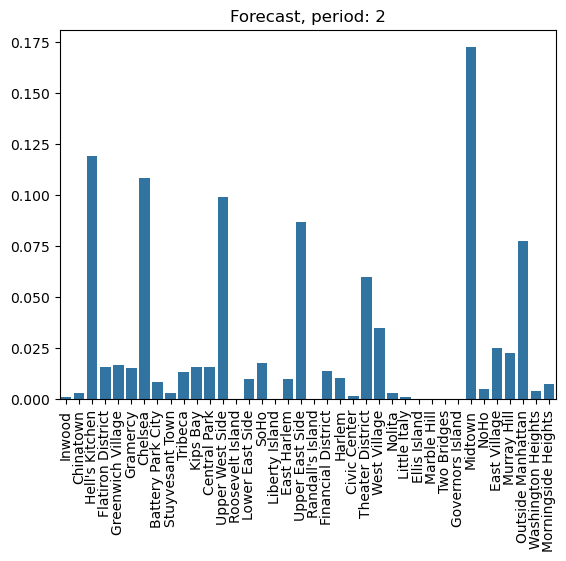

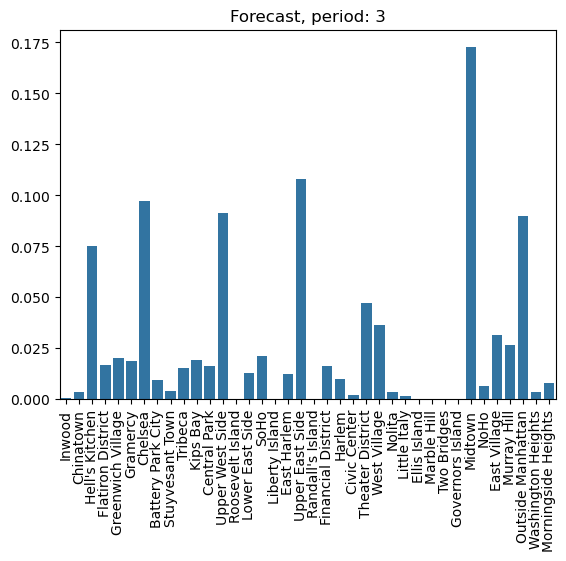

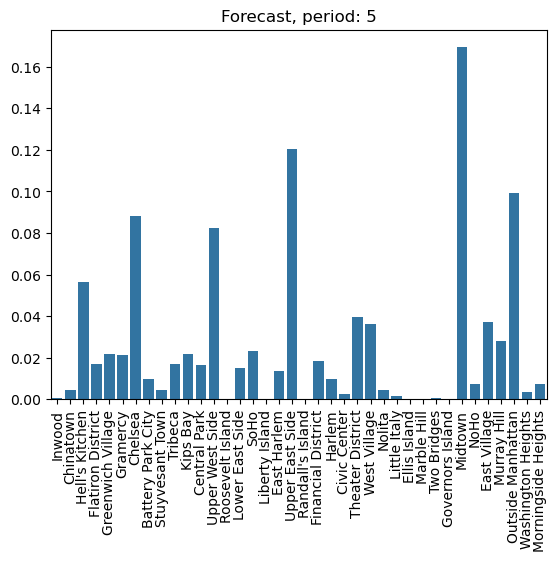

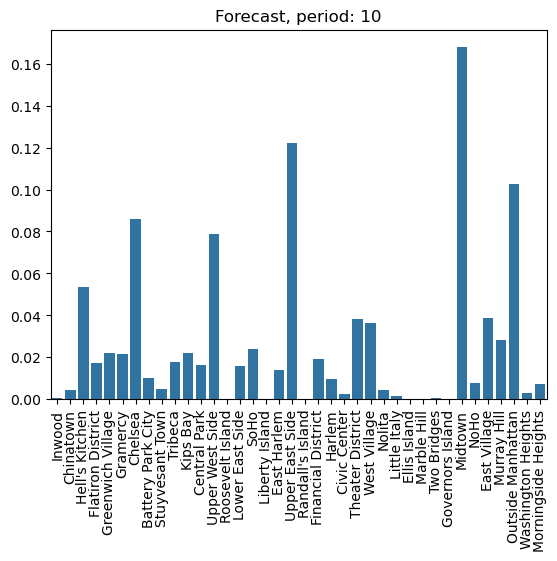

In [ ]:
np.random.seed(314)

initial_state = "Hell's Kitchen"
state_index = states.index(initial_state)

state_index

density = np.zeros(len(states))
density[state_index] = 1

for t in range(10):
    density = tr_pr @ density
    if t in [1, 2, 4, 9]: # 2, 3, 5 & 10 time steps
        sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
        plt.xticks(rotation=90)
        plt.show()

#### Upper East Side Forecast

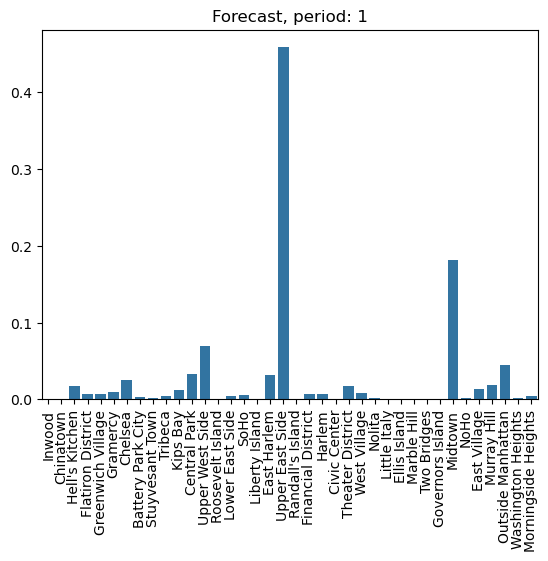

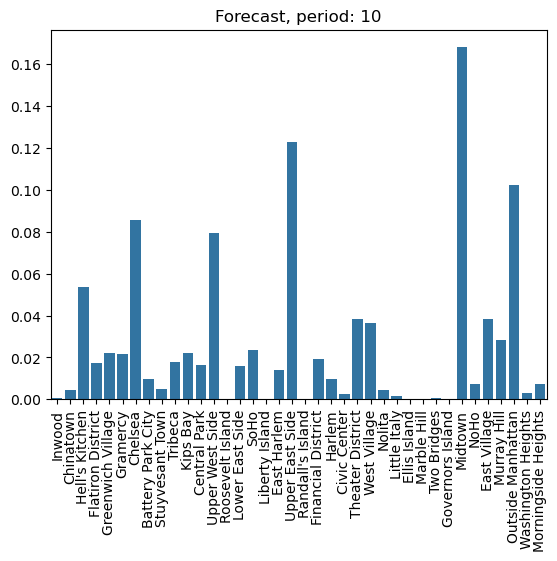

In [78]:
np.random.seed(314)

initial_state = 'Upper East Side'
state_index = states.index(initial_state)

state_index

density = np.zeros(len(states))
density[state_index] = 1

forecast = []
for t in range(10):
    density = tr_pr @ density
    forecast.append(density)
    if t in [0, 9]: # initial vs. converged densities
        sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
        plt.xticks(rotation=90)
        plt.show()

According to the chain's long-run behavior, cabs spend most of their time in Midtown, Upper East Side, Outside Manhattan, Chelsea, Upper West Side, and Hell's Kitchen.